<a href="https://colab.research.google.com/github/Anna172/ML/blob/master/%D0%B4%D0%B71_fd1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#выводы не написаны, в конце грязно, датасет не скачан
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv("HW1_var_11.csv", delimiter=';')
data.head()

,Номер варианта,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,11,1000011,Поступление зарплаты на счет,Другое,0,0.33,женский,0,0,высшее,вспомогательный персонал,>100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,1000031,Форма банка (без печати работодателя),Лечение,1,0.49,женский,0,0,среднее-специальное,вспомогательный персонал,>250,0.0,109.0,46.0,Торговля,ЗАО,холост / не замужем,3.0,2.0,2.0,1.0,0.0,0.089109,0.0,0.0,0.0,0.0,0.600000,3.0,2.0,92.0,5.0,2.0,1.0,17.0,43.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11,1000051,2НДФЛ,Другое,1,0.59,женский,0,0,среднее-специальное,вспомогательный персонал,>250,0.0,47.0,47.0,Торговля,ООО,холост / не замужем,1.0,0.0,0.0,0.0,0.0,0.006369,1.0,0.0,0.0,0.0,0.555556,5.0,4.0,156.0,9.0,3.0,1.0,18.0,89.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,1000071,Поступление зарплаты на счет,Покупка автомобиля,1,0.36,мужской,0,0,высшее,специалист,>250,0.0,32.0,27.0,Информационные технологии,ООО,холост / не замужем,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,7.0,1.0,0.0,1.0,32.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11,1000091,Свободная форма с печатью работодателя,Ремонт,1,0.53,женский,0,0,высшее,специалист,< 50,0.0,27.0,50.0,Производство,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Сразу удалим из датасета переменные без описания и технического характера

In [3]:
data = data.drop("Номер варианта", axis = 1)
data = data.drop("ID", axis = 1)
data = data.drop("thirty_in_a_year", axis = 1)
data = data.drop("sixty_in_a_year", axis = 1)
data = data.drop("ninety_in_a_year", axis = 1)
data = data.drop("thirty_vintage", axis = 1)
data = data.drop("sixty_vintage", axis = 1)
data = data.drop("ninety_vintage", axis = 1)

data.shape

(10242, 36)

По каждой переменной набора данных рассчитаем: число уникальных значений (UNIQUE и PERCENT_UNIQUE), число нудевых значений (ZEROS и PERCENT_ZEROS), число пропущенных значений (NANS и PERCENT_NANS) и тип данных (DATA_TYPE). Результаты приведены в таблице ниже:

In [4]:
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt


,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
INCOME_BASE_TYPE,5,0.0488186,0,0,61,0.595587,object
CREDIT_PURPOSE,10,0.0976372,0,0,0,0,object
INSURANCE_FLAG,2,0.0195274,3975,38.8108,0,0,int64
DTI,61,0.595587,2,0.0195274,122,1.19117,float64
SEX,2,0.0195274,0,0,0,0,object
FULL_AGE_CHILD_NUMBER,6,0.0585823,6073,59.2951,0,0,int64
DEPENDANT_NUMBER,4,0.0390549,10214,99.7266,0,0,int64
EDUCATION,9,0.0878735,0,0,0,0,object
EMPL_TYPE,10,0.0976372,0,0,2,0.0195274,object
EMPL_SIZE,9,0.0878735,0,0,118,1.15212,object


In [25]:
object_type_columns = dt[dt['DATA_TYPE'] == 'object'].index
object_type_columns = object_type_columns.tolist()

for col in object_type_columns:
  print(col, data[col].unique().tolist())

INCOME_BASE_TYPE ['Форма банка (без печати работодателя)', '2НДФЛ', 'Поступление зарплаты на счет', 'Свободная форма с печатью работодателя']
CREDIT_PURPOSE ['Лечение', 'Другое', 'Покупка автомобиля', 'Покупка недвижимости/ строительство', 'Ремонт', 'Покупка земли', 'Отпуск', 'Покупка мебели', 'Покупка бытовой техники', 'Обучение']
SEX ['женский', 'мужской']
EDUCATION ['среднее-специальное', 'высшее', 'Высшее/Второе высшее/Ученая степень', 'незаконченное высшее', 'второе высшее', 'среднее', '*n.a.*', 'ученая степень', 'Неполное среднее']
EMPL_TYPE ['вспомогательный персонал', 'специалист', 'менеджер среднего звена', 'рабочий', 'менеджер высшего звена', 'торговый представитель', 'менеджер по продажам', 'страховой агент', 'другое']
EMPL_SIZE ['>250', '< 50', '*n.a.*']
EMPL_PROPERTY ['Торговля', 'Информационные технологии', 'Другое', 'Сельское и лесное хозяйство', 'Юридические услуги']
EMPL_FORM ['ЗАО', 'ООО', 'ОАО', 'Индивидуальный предприниматель', 'Государственное предприятие', 'Иная ф

Показатель количество кредитов (all_credits) не имеет нулевых значений, однако 63% наблюдений имеют пропущеные значеня по этому признаку. Также 63% наблюдений имеют пропущенные значения по таким признакам как num_AccountActive180, if_zaog и другим признакам, которые могут быть только у клиентов, имевших хоть 1 кредит. Соответственно, можно сделать вывод, что эти наблюдения не имеют кредитной истории, а потому не помогут быть использованы для сегментации клиентов банка, которые имеют кредит. На 3% меньше пропусков в наблюдениях по таким признакам как кол-во запросов в бюро кредитных историй за последние N дней (maxNdays), логично предположить, что эти три процента только пытаются получить свой первый кредит, и поним также нет кредитной истории. Таким образом, наблюдения, неимеющие кредитной истории мы можем исключить из нашей выборки.

In [5]:
data = data[data['all_credits'] > 0]
data.shape

(3763, 36)

Данные в выборке значительно сократились, однако только они имеют необходимый объем информации для сегментации. А объем выборки тем не менее удовлетворителен.

Еще раз посмотрим на данные после удаления записей без кредитной истории:

In [6]:
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
INCOME_BASE_TYPE,4,0.106298,0,0,0,0,object
CREDIT_PURPOSE,10,0.265745,0,0,0,0,object
INSURANCE_FLAG,2,0.0531491,1443,38.3471,0,0,int64
DTI,58,1.54132,1,0.0265745,1,0.0265745,float64
SEX,2,0.0531491,0,0,0,0,object
FULL_AGE_CHILD_NUMBER,5,0.132873,2254,59.899,0,0,int64
DEPENDANT_NUMBER,3,0.0797236,3755,99.7874,0,0,int64
EDUCATION,9,0.239171,0,0,0,0,object
EMPL_TYPE,9,0.239171,0,0,0,0,object
EMPL_SIZE,3,0.0797236,0,0,0,0,object


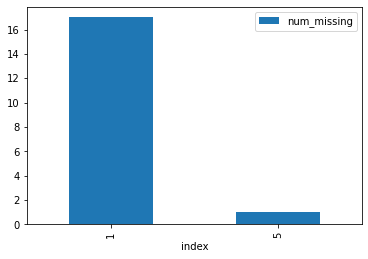

In [7]:
# Теперь проверием клиентов на полноту данных
#сначала создаем индикатор для признаков с пропущенными данными

md = pd.DataFrame(index=data.index)
for col in data.columns:
    missing = data[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        #print('created missing indicator for: {}'.format(col))
        md['{}_ismissing'.format(col)] = missing


# затем на основе индикатора строим гистограмму
ismissing_cols = [col for col in md.columns if 'ismissing' in col]
md['num_missing'] = md[ismissing_cols].sum(axis=1)

md[md['num_missing'] > 0]['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Итого у нас остался один клиент по которому у нас много пропущенной информации, можно удалить его из выборки без особых потерь. Также есть еще 16 записей с пропущенными значениями по показателю среднего кол-ва задержки (avg_num_delay), заменим эти пропуски средним значением по набору данных. И одно наблюдение с пропущенным значением по признаку DTI, это пропуск тоже заменим на среднее значение. 

In [8]:
data = data[data['max14days'] >= 0]
meanDTI = data['DTI'].mean()
mean_avg_num_delay = data['avg_num_delay'].mean()
data['avg_num_delay'] = data['avg_num_delay'].fillna(mean_avg_num_delay )
data['DTI'] = data['DTI'].fillna(meanDTI )

data.shape

(3762, 36)



Общий анализ уникальных и нулевых значений также показал, что переменная Dependent_number практически на 100% состоит из 0, а значит не несет дополнительной информации и ее можно удалить. 

В наборе данных есть категориаьные переменные, в основном представленные в виде объекта типа object. В дальнейшем для проведения сегментации их необходимо будет преобразовать при помощи OneHotEncoder.



In [9]:
data = data.drop("DEPENDANT_NUMBER", axis = 1)
dt = dt.drop("DEPENDANT_NUMBER", axis = 0)
data.shape

(3762, 35)

In [10]:
# Итого после преобразований получим
columns = ["UNIQUE", 'PERCENT_UNIQUE', 'ZEROS', 'PERCENT_ZEROS', 'NANS', 'PERCENT_NANS', 'DATA_TYPE']
dt = pd.DataFrame(index=data.columns, columns=columns)

for col in data.columns:
  dt.loc[col,"UNIQUE"] = len(data[col].unique())
  dt.loc[col,"PERCENT_UNIQUE"] = dt.loc[col,"UNIQUE"]/len(data[col])*100
  dt.loc[col,"NANS"] = np.sum(data[col].isnull())
  dt.loc[col,"PERCENT_NANS"] = dt.loc[col,"NANS"]/len(data[col])*100
  dt.loc[col,"ZEROS"] = (data[col] == 0).sum()
  dt.loc[col,"PERCENT_ZEROS"] = dt.loc[col,"ZEROS"]/len(data[col])*100
  dt["DATA_TYPE"] = data.dtypes   

dt

,UNIQUE,PERCENT_UNIQUE,ZEROS,PERCENT_ZEROS,NANS,PERCENT_NANS,DATA_TYPE
INCOME_BASE_TYPE,4,0.106326,0,0,0,0,object
CREDIT_PURPOSE,10,0.265816,0,0,0,0,object
INSURANCE_FLAG,2,0.0531632,1442,38.3307,0,0,int64
DTI,58,1.54173,1,0.0265816,0,0,float64
SEX,2,0.0531632,0,0,0,0,object
FULL_AGE_CHILD_NUMBER,5,0.132908,2253,59.8884,0,0,int64
EDUCATION,9,0.239234,0,0,0,0,object
EMPL_TYPE,9,0.239234,0,0,0,0,object
EMPL_SIZE,3,0.0797448,0,0,0,0,object
BANKACCOUNT_FLAG,3,0.0797448,3102,82.4561,0,0,float64


In [11]:
# создадим списки категориальных переменных, чтобы потом исследовать распределение набора данных по ним
# создадим список переменых типа object, чтоы потом кодировать из в числовые переменные, это нужно для построения моели на этих данных
categorical_columns = dt[dt['UNIQUE'] < 11].index
notcategorical_columns = dt[dt['UNIQUE'] > 10].index
categorical_columns = categorical_columns.tolist()
notcategorical_columns = notcategorical_columns.tolist()
object_type_columns = dt[dt['DATA_TYPE'] == 'object'].index
object_type_columns = object_type_columns.tolist()

print(len(object_type_columns), len(categorical_columns), len(notcategorical_columns))


9 19 16


Проведем анализ описательных статистик по численным переменным набора данных:

In [12]:
columns = ["COUNT", 'MEAN', 'STD', 'MIN', '25%', '50%', '75%', 'MAX']
numeric_data = data.select_dtypes(include=np.number)
dt = pd.DataFrame(index=numeric_data.columns, columns=columns)

for col in numeric_data.columns:
  dt.loc[col,"COUNT"] = numeric_data[numeric_data[col] >= 0][col].count()
  dt.loc[col,"MEAN"] = numeric_data[numeric_data[col] >= 0][col].mean()
  dt.loc[col,"STD"] = numeric_data[numeric_data[col] >= 0][col].std()
  dt.loc[col,"MIN"] = numeric_data[numeric_data[col] >= 0][col].min()
  dt.loc[col,"25%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.25)
  dt.loc[col,"50%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.50)
  dt.loc[col,"75%"] = numeric_data[numeric_data[col] >= 0][col].quantile(q = 0.75)
  dt.loc[col,"MAX"] = numeric_data[numeric_data[col] >= 0][col].max()

dt

,COUNT,MEAN,STD,MIN,25%,50%,75%,MAX
INSURANCE_FLAG,3762,0.616693,0.486257,0,0,1,1,1
DTI,3762,0.389774,0.135934,0,0.28,0.41,0.49,0.59
FULL_AGE_CHILD_NUMBER,3762,0.548644,0.765793,0,0,0,1,4
BANKACCOUNT_FLAG,3762,0.30622,0.777788,0,0,0,0,3
Period_at_work,3762,55.9351,54.2952,6,18,39,75,432
age,3762,35.9726,8.48701,23,29,34,42,63
max90days,3762,1.68448,1.93778,0,0,1,2,31
max60days,3762,1.19006,1.57022,0,0,1,2,14
max30days,3762,0.866295,1.31623,0,0,0,1,12
max21days,3762,0.639022,1.13907,0,0,0,1,12


При анализе описательных статистик было выявлено, что некоторые пременные, например, Period_at_work, sum_of_paym_months и max_MnthAfterLoan имеют выбросы. Так как максимальное значение в несколько раз отличается от 75% квантиле. Далее будет проведен более подробный анализ выбросов.

По численным переменным была построена корреляционная карта:

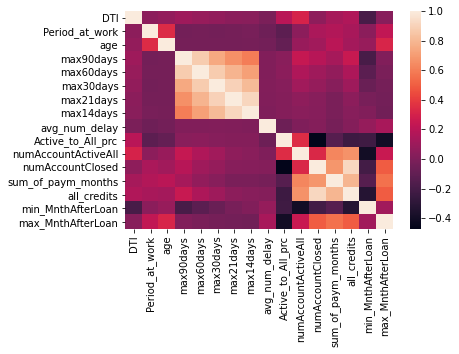

In [16]:
sns.heatmap(numeric_data.corr())

Карта показывает, что в основном, между переменными наблюдается низкая корреляция, а потому лиейно-регрессионный анализ в данном случае может быть неуместен.

На рисунке ниже приведены гистограммы по численным переменным (с опущенными пропусками) набора данных:

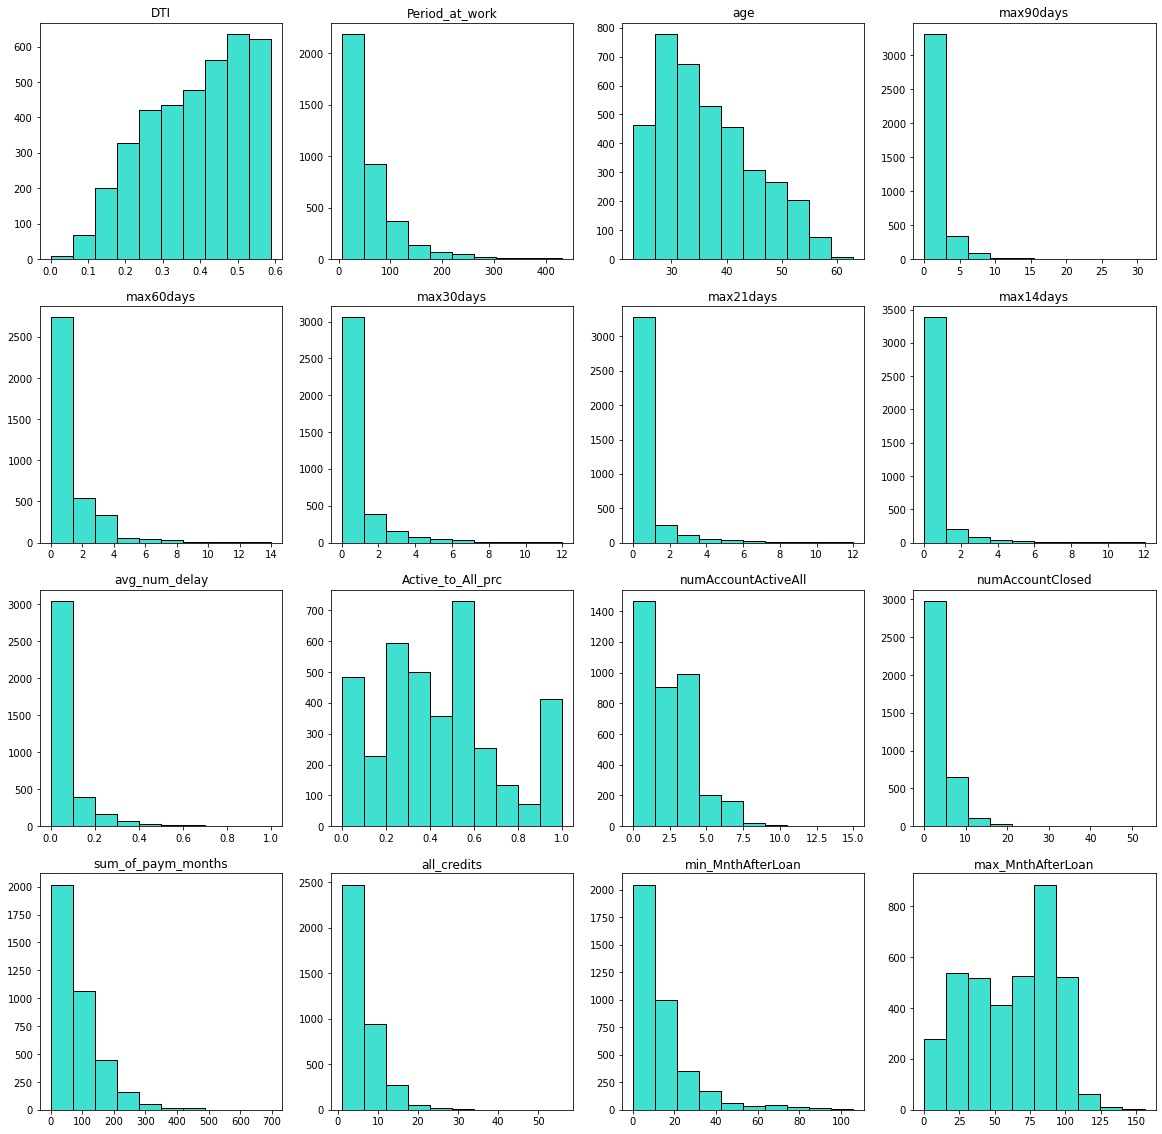

In [17]:
r = 4
c = 4
numeric_data = data[notcategorical_columns].select_dtypes(include=np.number)
fig, ax = plt.subplots(r, c, figsize = (c*5, r*5))

i = 0
j = 0

for col in numeric_data.columns:
    if (i < r) & (j < c): 
      ax[i, j].hist(numeric_data[numeric_data[col] >= 0][col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    elif (i < r) & (j == c):
      j = 0
      i += 1
      ax[i, j].hist(numeric_data[numeric_data[col] >= 0][col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    else:
      print('ERROR')  
 
plt.show()

Из визуального анализа гистограмм можно заметить, что в выборке присутствуют, в основном, молодое поколение (до 40 лет) с небольшим количеством дней работы(до 100 дней), и отсутствуют пожилые люди (после 60 лет), а также люди, работающие более года (AGE и Period_at_work). Также в выборке достаточно много индивидов с высоким отношением долга к доходам (DTI). Велико число человек с низким числом активных кредитов и банковских счетов (all_credits и numAccountActiveAll), а также недавно взявших свой первый кредит (max_MnthAfterLoan), совершивших небольшое число платежей за послений месяц (sum_of_paym_months). Это наводит на мысль, что в данных должны проявиться как минимум следующие кластеры: молодые люди, взявшие один кредит и имеющие низкие доход, так, что соотношение долга к доходам значительно и люди среднего возраста, имеющие активную кредитную историю.

Теперь посмотрим на категориальные переменные. Проверим на наличие некорректных ззнаков. Так как переменных для проверки немного, уникальных значений в них тоже немного, поэтому можно провести проверку на наличие некорректных знаков путем простого просмотра уникальных значений.

In [20]:
for col in object_type_columns:
  print(col, data[col].unique().tolist())

INCOME_BASE_TYPE ['Форма банка (без печати работодателя)', '2НДФЛ', 'Поступление зарплаты на счет', 'Свободная форма с печатью работодателя']
CREDIT_PURPOSE ['Лечение', 'Другое', 'Покупка автомобиля', 'Покупка недвижимости/ строительство', 'Ремонт', 'Покупка земли', 'Отпуск', 'Покупка мебели', 'Покупка бытовой техники', 'Обучение']
SEX ['женский', 'мужской']
EDUCATION ['среднее-специальное', 'высшее', 'Высшее/Второе высшее/Ученая степень', 'незаконченное высшее', 'второе высшее', 'среднее', '*n.a.*', 'ученая степень', 'Неполное среднее']
EMPL_TYPE ['вспомогательный персонал', 'специалист', 'менеджер среднего звена', 'рабочий', 'менеджер высшего звена', 'торговый представитель', 'менеджер по продажам', 'страховой агент', 'другое']
EMPL_SIZE ['>250', '< 50', '*n.a.*']
EMPL_PROPERTY ['Торговля', 'Информационные технологии', 'Другое', 'Сельское и лесное хозяйство', 'Юридические услуги']
EMPL_FORM ['ЗАО', 'ООО', 'ОАО', 'Индивидуальный предприниматель', 'Государственное предприятие', 'Иная ф

In [24]:
print(data[data['EDUCATION'] == 'Высшее/Второе высшее/Ученая степень'].shape[0])

635


EDUCATION имеет значение Высшее/Второе высшее/Ученая степень, которое дублирует три другие значения. Это странно, но такое значение принимает достаточно большое количество наблюдений, поэтому удалять их нецелесообразно. Поставить всем им вместо этого значения наиболее часто встречающееся из высшего, второго высшего или ученой степени будет, наверное, не совсем правильно, поэтому просто оставим это как есть. В остальном некорректных значений не было обнаружено.

In [26]:
# чтобы посмотреть распределение данных по категориальным переменным, создадим набор категориальных данных, где закодируем все переменные типа объект в числовые переменные

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
cd = pd.DataFrame( data[categorical_columns])

for col in object_type_columns:
  cd[col] = labelencoder.fit_transform(cd[col].astype(str))

cd.tail()

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,SEX,FULL_AGE_CHILD_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_not_cc,own_closed,dlq_exist
10229,2,4,1,1,1,4,5,2,0.0,3,5,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0
10231,1,8,1,1,0,4,4,2,0.0,0,5,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10232,2,9,0,0,0,4,3,2,0.0,3,3,2,0.0,0.0,0.0,0.0,1.0,1.0,1.0
10235,3,4,0,1,0,4,4,2,0.0,3,5,5,0.0,0.0,0.0,0.0,1.0,1.0,1.0
10241,0,9,1,1,0,4,4,2,0.0,3,5,2,1.0,0.0,0.0,0.0,1.0,2.0,1.0


Теперь рассмотрим распределение данных по категориальным переменным


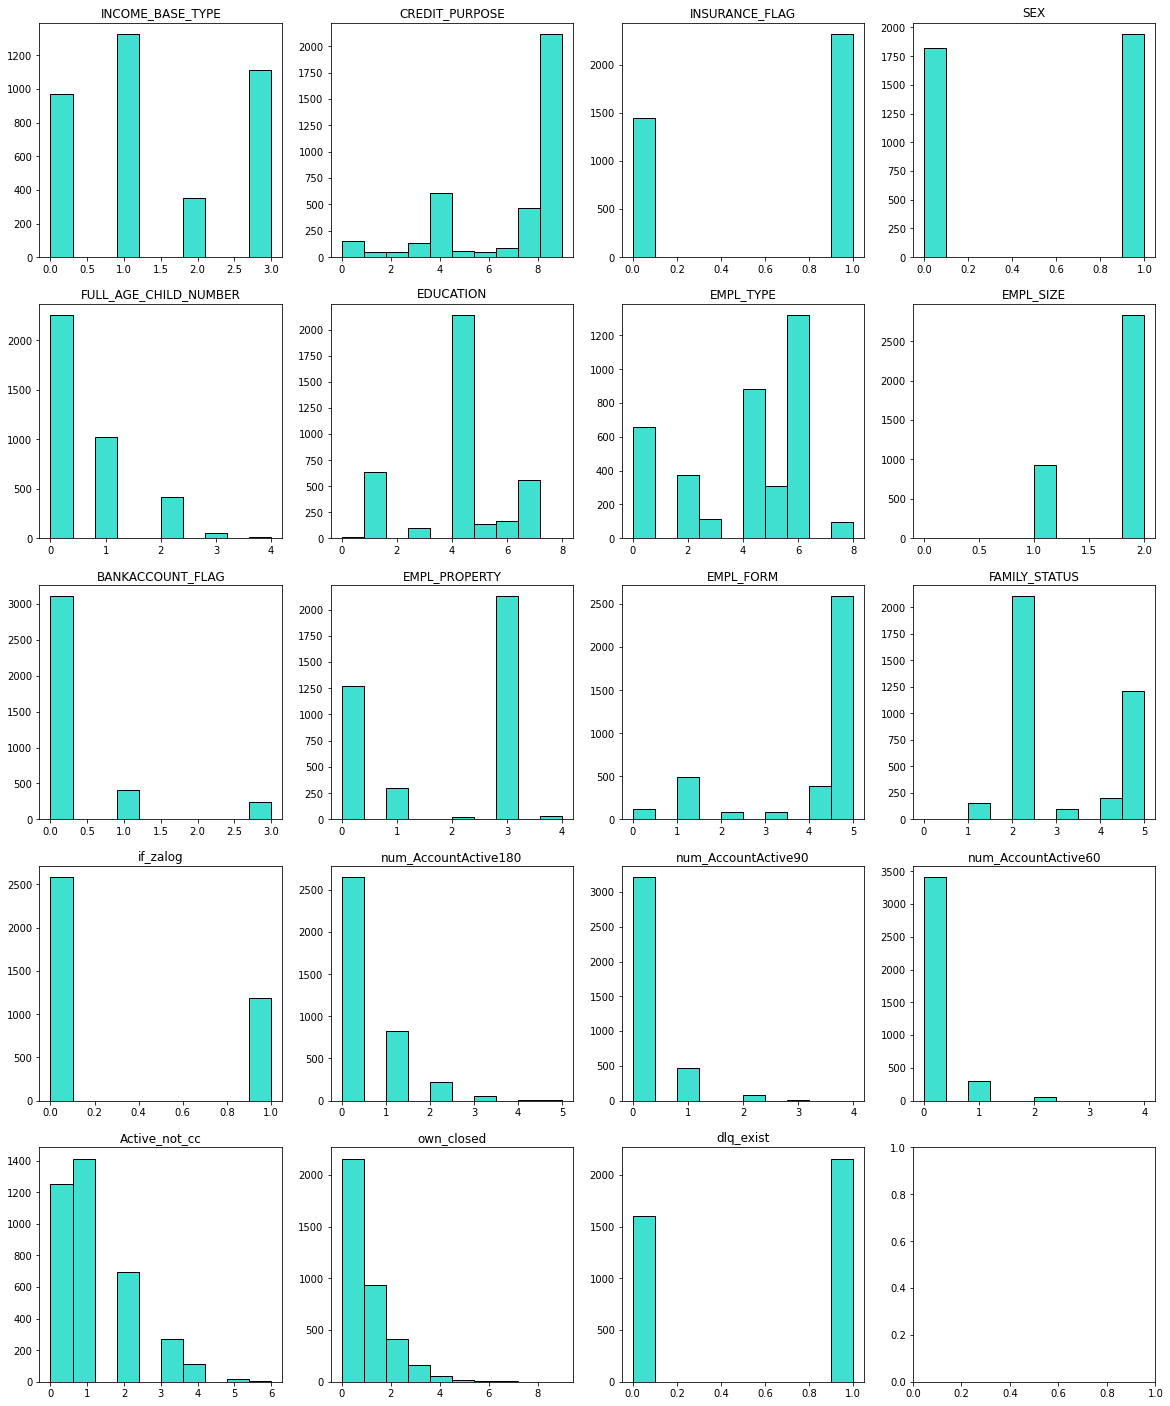

In [27]:
r = 5
c = 4
categorical_data = cd[categorical_columns].select_dtypes(include=np.number)
fig, ax = plt.subplots(r, c, figsize = (c*5, r*5))

i = 0
j = 0

for col in categorical_data.columns:
    if (i < r) & (j < c): 
      ax[i, j].hist(categorical_data[col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    elif (i < r) & (j == c):
      j = 0
      i += 1
      ax[i, j].hist(categorical_data[col], color = 'turquoise', edgecolor = 'black')
      ax[i, j].set_title(col)
      j += 1
    else:
      print('ERROR')  
 
plt.show()

Можно отметить, что соотношение категориальных переменных, в основном, непропорционально, а потому они не являются подходящим для сегментации признаками. Переменные INCOME_BASE_TYPE, SEX и dlq_exist распределены пропорционально и не имеют выбросов, что сохраняет принцип онородности-разнородности, так как нет "скошенности" в одну сторону категории, и категории четко различимы в данных, поэтому они будут хорошими признаками для сегментации.

Теперь проведем анализ выбросов в числовых наборах данных. Для этого построим боксплоты.

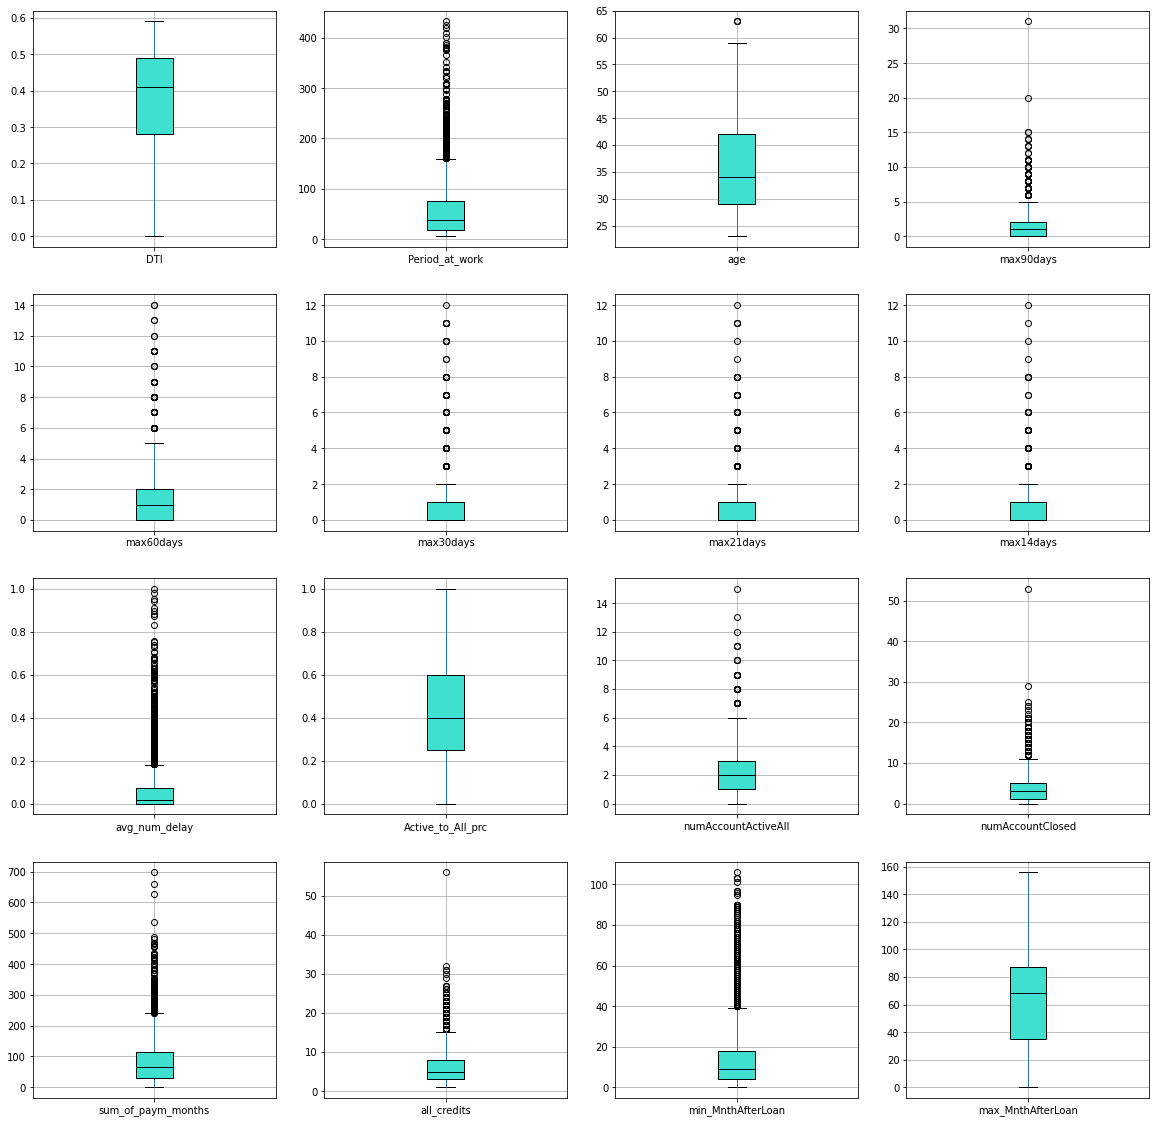

In [28]:
r = 4
c = 4
numeric_data = data[notcategorical_columns].select_dtypes(include=np.number)
fig, ax = plt.subplots(r, c, figsize = (r*5, c*5))

i = 0
j = 0

for col in numeric_data.columns:
    if (i < r) & (j < c):
      numeric_data[numeric_data[col] >= 0].boxplot(column=col, ax=ax[i, j], patch_artist=True, 
                           boxprops=dict(facecolor='turquoise', color='black'),
                           medianprops=dict(color='black'))
                           
      j += 1
    elif (i < r) & (j == c):
      j = 0
      i += 1
      numeric_data[numeric_data[col] >= 0].boxplot(column=col, ax=ax[i, j], patch_artist=True, 
                           boxprops=dict(facecolor='turquoise', color='black'),
                           medianprops=dict(color='black'))
      j += 1
    else:
      print('ERROR')  
 
plt.show()

Переменные DTI, age, Active_to_All_prc и max_MnthAfterLoan не имеют выбрасов, поэтому их хорошо использовать в модели. Такие поля как Period_at_work, avg_num_delay, sum_of_paym_months min_MonthAfterLoan имеют очень большое количество выбросов. Довольно много выбросов имеют также max90days, numAccountClosed, all_credits. Удалять выбросы нецелесообразно, так как их много, а набор данных небольшой. Можено удалить выбросы точечно, чтобы стало чуть лучше, но обьем данных уменьшился незаметно.

In [29]:
data.shape

(3762, 35)

In [30]:
data = data[data['all_credits'] < 40]
data = data[data['numAccountClosed'] < 28]
data = data[data['max90days'] < 19]
data = data[data['age'] < 60]
data = data[data['sum_of_paym_months'] < 500]
data = data[data['numAccountActiveAll'] < 12]
data = data[data['all_credits'] < 28]
data = data[data['numAccountClosed'] < 23]
data.shape

(3743, 35)

In [ ]:
#data.to_csv("Anna_Trushnikova_BBI172_HW1_0.csv", index=False)

ДАЛЕЕ МОЖНО ПРЕОБРАЗОВАТЬ КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ

In [31]:
data.shape

(3743, 35)

In [33]:
one_hot_encoder = OneHotEncoder(sparse=False)

for col in object_type_columns:
  data[data[col].unique().tolist()] = one_hot_encoder.fit_transform(data[col].values.reshape(-1,1))

data.head()

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,BANKACCOUNT_FLAG,Period_at_work,age,EMPL_PROPERTY,EMPL_FORM,FAMILY_STATUS,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,Форма банка (без печати работодателя),2НДФЛ,Поступление зарплаты на счет,Свободная форма с печатью работодателя,Лечение,...,Покупка бытовой техники,Обучение,женский,мужской,среднее-специальное,высшее,Высшее/Второе высшее/Ученая степень,незаконченное высшее,второе высшее,среднее,*n.a.*,ученая степень,Неполное среднее,вспомогательный персонал,специалист,менеджер среднего звена,рабочий,менеджер высшего звена,торговый представитель,менеджер по продажам,страховой агент,другое,>250,< 50,Торговля,Информационные технологии,Сельское и лесное хозяйство,Юридические услуги,ЗАО,ООО,ОАО,Индивидуальный предприниматель,Государственное предприятие,Иная форма,холост / не замужем,женат / замужем,разведен / разведена,гражданский брак,повторный брак,вдовец / вдова
1,Форма банка (без печати работодателя),Лечение,1,0.49,женский,0,среднее-специальное,вспомогательный персонал,>250,0.0,109.0,46.0,Торговля,ЗАО,холост / не замужем,3.0,2.0,2.0,1.0,0.0,0.089109,0.0,0.0,0.0,0.0,0.600000,3.0,2.0,92.0,5.0,2.0,1.0,17.0,43.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2НДФЛ,Другое,1,0.59,женский,0,среднее-специальное,вспомогательный персонал,>250,0.0,47.0,47.0,Торговля,ООО,холост / не замужем,1.0,0.0,0.0,0.0,0.0,0.006369,1.0,0.0,0.0,0.0,0.555556,5.0,4.0,156.0,9.0,3.0,1.0,18.0,89.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Поступление зарплаты на счет,Покупка автомобиля,1,0.36,мужской,0,высшее,специалист,>250,0.0,32.0,27.0,Информационные технологии,ООО,холост / не замужем,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,7.0,1.0,0.0,1.0,32.0,32.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13,Поступление зарплаты на счет,Покупка недвижимости/ строительство,1,0.50,мужской,0,высшее,менеджер среднего звена,>250,0.0,6.0,53.0,Торговля,ЗАО,холост / не замужем,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.0,0.0,0.0,0.500000,3.0,3.0,46.0,6.0,2.0,3.0,3.0,28.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15,Свободная форма с печатью работодателя,Покупка автомобиля,0,0.47,мужской,1,высшее,рабочий,>250,0.0,53.0,26.0,Другое,ОАО,женат / замужем,3.0,2.0,2.0,2.0,1.0,0.023622,1.0,0.0,0.0,0.0,0.375000,3.0,5.0,124.0,8.0,2.0,0.0,8.0,50.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
data.shape

(3743, 87)

In [37]:
data = data.drop(object_type_columns, axis=1)

In [41]:
# на этом все, выводы не написаны, в конце грязно, датасет не скачан
data.shape


(3743, 78)

ВЫВОДЫ ПО ПЕРВОЙ ЧАСТИ РАБОТЫ:



*   В данных достаточно много пропущенных значений, выбрасывать их нецелесообразно. Пропущенные значения заменяются константой -37.

*   Переменные MIN_MNTHAFTERLOAN и MAX_MNTHAFTERLOAN имеют недопустимые значения, которые было решено удалить из выборки.

*   Переменные слабо коррелируют между собой, линейно-регрессионный анализ неуместен.

*   Для кодировки пропущенных значений в данных также присутствует строковая метка '*n.a*'.


С учетом всех корректировок была составлена финальная витрина.



In [39]:
data.head()

,INSURANCE_FLAG,DTI,FULL_AGE_CHILD_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,Форма банка (без печати работодателя),2НДФЛ,Поступление зарплаты на счет,Свободная форма с печатью работодателя,Лечение,Другое,Покупка автомобиля,Покупка недвижимости/ строительство,Ремонт,Покупка земли,Отпуск,Покупка мебели,Покупка бытовой техники,Обучение,женский,мужской,среднее-специальное,высшее,Высшее/Второе высшее/Ученая степень,незаконченное высшее,второе высшее,среднее,*n.a.*,ученая степень,Неполное среднее,вспомогательный персонал,специалист,менеджер среднего звена,рабочий,менеджер высшего звена,торговый представитель,менеджер по продажам,страховой агент,другое,>250,< 50,Торговля,Информационные технологии,Сельское и лесное хозяйство,Юридические услуги,ЗАО,ООО,ОАО,Индивидуальный предприниматель,Государственное предприятие,Иная форма,холост / не замужем,женат / замужем,разведен / разведена,гражданский брак,повторный брак,вдовец / вдова
1,1,0.49,0,0.0,109.0,46.0,3.0,2.0,2.0,1.0,0.0,0.089109,0.0,0.0,0.0,0.0,0.600000,3.0,2.0,92.0,5.0,2.0,1.0,17.0,43.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0.59,0,0.0,47.0,47.0,1.0,0.0,0.0,0.0,0.0,0.006369,1.0,0.0,0.0,0.0,0.555556,5.0,4.0,156.0,9.0,3.0,1.0,18.0,89.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1,0.36,0,0.0,32.0,27.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,7.0,1.0,0.0,1.0,32.0,32.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
13,1,0.50,0,0.0,6.0,53.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,2.0,0.0,0.0,0.500000,3.0,3.0,46.0,6.0,2.0,3.0,3.0,28.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15,0,0.47,1,0.0,53.0,26.0,3.0,2.0,2.0,2.0,1.0,0.023622,1.0,0.0,0.0,0.0,0.375000,3.0,5.0,124.0,8.0,2.0,0.0,8.0,50.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
#data.to_csv("Anna_Trushnikova_BBI172_HW1_0.csv", index=False)

In [ ]:
one_hot_encoder = OneHotEncoder(sparse=False)
cd = pd.DataFrame(index=data.index)
cd[data['EDUCATION'].unique().tolist()] = one_hot_encoder.fit_transform(data['EDUCATION'].values.reshape(-1,1))
cd.head()

In [ ]:
a = data[data['EDUCATION'].isnull() != 1 ]
a['EDUCATION'].unique().tolist()

['высшее',
 'среднее-специальное',
 'незаконченное высшее',
 'Высшее/Второе высшее/Ученая степень',
 'второе высшее',
 'среднее',
 '*n.a.*',
 'ученая степень',
 'Неполное среднее']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
cd = pd.DataFrame(index=data.index)
cd[['женский','мужской']] = one_hot_encoder.fit_transform(data['SEX'].values.reshape(-1,1))
cd[data['EDUCATION'].unique().tolist()] = one_hot_encoder.fit_transform(data['EDUCATION'].values.reshape(-1,1))
cd.head()



,женский,мужской,высшее,среднее-специальное,незаконченное высшее,Высшее/Второе высшее/Ученая степень,второе высшее,среднее,*n.a.*,ученая степень,Неполное среднее
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [95]:
data.shape

(3762, 36)